In [1]:
import numpy as np
from numpy.fft import fft,ifft
from PIL import Image

In [2]:
pic = Image.open('20200424171442.png')

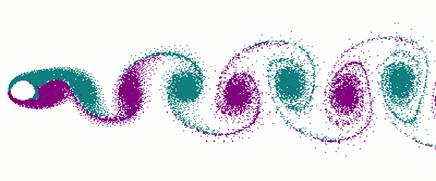

In [5]:
pic

In [8]:
pic_data = np.fromstring(pic.tobytes(),dtype=np.int8)
pic_data

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([-2, -1, -4, ..., -2, -1, -4], dtype=int8)

In [9]:
pic_data_fft = fft(pic_data)
pic_data_fft

array([-1077627.             +0.j        ,
         168581.1854593 -111910.78993761j,
         377033.52419647+208300.20617794j, ...,
        -478792.18046562+258679.85891435j,
         377033.52419647-208300.20617794j,
         168581.1854593 +111910.78993761j])

In [11]:
np.where(np.abs(pic_data_fft)<1e5,0,pic_data_fft)

array([-1077627.             +0.j        ,
         168581.1854593 -111910.78993761j,
         377033.52419647+208300.20617794j, ...,
        -478792.18046562+258679.85891435j,
         377033.52419647-208300.20617794j,
         168581.1854593 +111910.78993761j])

In [12]:
pic_data_fft[np.where(np.abs(pic_data_fft)<1e5)] = 0

In [13]:
pic_data_ifft = ifft(pic_data_fft)
pic_data_ifft

array([-5.40804768+3.99527975e-16j, -4.65611815+4.76360278e-16j,
       -9.68100555+7.37590107e-16j, ..., -5.63523168-6.26472222e-16j,
       -4.32164436+1.72120189e-15j, -9.02136967+4.24271843e-15j])

In [14]:
pic_data_real = np.real(pic_data_ifft)

In [15]:
pic_data_result = np.int8(pic_data_real)
pic_data_result

array([-5, -4, -9, ..., -5, -4, -9], dtype=int8)

In [16]:
pic_Image = Image.frombytes(data = pic_data_result,
                            size=pic.size,mode=pic.mode,)

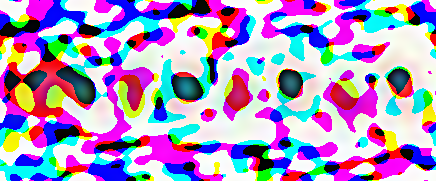

In [17]:
pic_Image